C:\Users\AAKASH\AppData\Local\Temp/ipykernel_10168/1122352325.py:48: RuntimeWarning: divide by zero encountered in true_divide
  visibility = (1 / distance_matrix[current_city]) ** beta


Best Route: [2, 0, 3, 4, 8, 5, 1, 9, 7, 6]
Best Distance: 4.89


C:\Users\AAKASH\AppData\Local\Temp/ipykernel_10168/1122352325.py:51: RuntimeWarning: invalid value encountered in multiply
  probabilities = pheromone_values * visibility


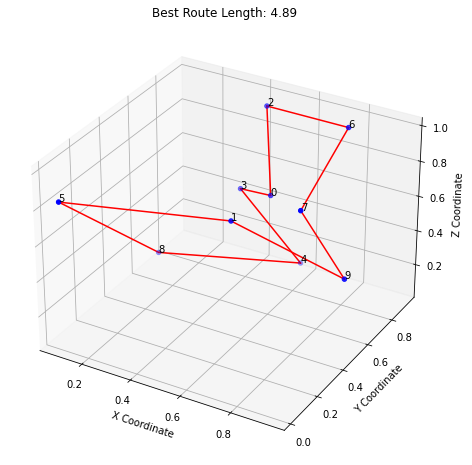

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Number of cities
num_cities = 10

# Create random city coordinates
np.random.seed(0)
cities_coordinates = np.random.rand(num_cities, 3)  # 3D coordinates

# Initialize pheromone levels
pheromone = np.ones((num_cities, num_cities))

# Initialize parameters
alpha = 1  # Pheromone factor
beta = 3   # Visibility factor
evaporation = 0.5
Q = 100
num_ants = 10
num_iterations = 100

# Calculate distance matrix
def calculate_distance_matrix(coordinates):
    x, y, z = coordinates[:, 0], coordinates[:, 1], coordinates[:, 2]
    dist_matrix = np.sqrt((x[:, np.newaxis] - x[np.newaxis, :])**2 +
                          (y[:, np.newaxis] - y[np.newaxis, :])**2 +
                          (z[:, np.newaxis] - z[np.newaxis, :])**2)
    return dist_matrix

distance_matrix = calculate_distance_matrix(cities_coordinates)

# ACO algorithm
best_distance = float('inf')
best_route = []

for iteration in range(num_iterations):
    ant_routes = []
    ant_distances = []
    
    for ant in range(num_ants):
        current_city = np.random.randint(num_cities)
        visited_cities = [current_city]
        total_distance = 0
        
        for _ in range(num_cities - 1):
            pheromone_values = pheromone[current_city] ** alpha
            visibility = (1 / distance_matrix[current_city]) ** beta
            
            # Calculate probabilities
            probabilities = pheromone_values * visibility
            probabilities[np.isin(np.arange(num_cities), visited_cities)] = 0
            
            probabilities /= probabilities.sum()
            
            # Choose next city based on probabilities
            next_city = np.random.choice(np.arange(num_cities), p=probabilities)
            
            # Update total distance
            total_distance += distance_matrix[current_city][next_city]
            
            # Move to the next city
            current_city = next_city
            visited_cities.append(current_city)
        
        # Add distance from last city to starting city
        total_distance += distance_matrix[current_city][visited_cities[0]]
        
        ant_routes.append(visited_cities)
        ant_distances.append(total_distance)
        
        # Update pheromone levels
        delta_pheromone = np.zeros((num_cities, num_cities))
        for i in range(num_cities):
            j = visited_cities[(visited_cities.index(i) + 1) % num_cities]
            delta_pheromone[i, j] = Q / total_distance
        
        pheromone = (1 - evaporation) * pheromone + delta_pheromone
    
    # Find best route
    best_ant_index = np.argmin(ant_distances)
    if ant_distances[best_ant_index] < best_distance:
        best_distance = ant_distances[best_ant_index]
        best_route = ant_routes[best_ant_index]
        
    # Evaporation
    pheromone *= (1 - evaporation)

# Print best route and distance
print(f"Best Route: {best_route}")
print(f"Best Distance: {best_distance:.2f}")

# Plot best route in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for cities
ax.scatter(cities_coordinates[:, 0], cities_coordinates[:, 1], cities_coordinates[:, 2], c='blue')
for i in range(num_cities):
    ax.text(cities_coordinates[i, 0], cities_coordinates[i, 1], cities_coordinates[i, 2], str(i), color='black')

# Plot best route
for i in range(num_cities):
    j = (i + 1) % num_cities
    city_i = best_route[i]
    city_j = best_route[j]
    ax.plot([cities_coordinates[city_i, 0], cities_coordinates[city_j, 0]],
            [cities_coordinates[city_i, 1], cities_coordinates[city_j, 1]],
            [cities_coordinates[city_i, 2], cities_coordinates[city_j, 2]], c='red')

ax.set_title(f"Best Route Length: {best_distance:.2f}")
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")
ax.set_zlabel("Z Coordinate")
plt.show()
